In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

'''
En este Script vamos a simular la eq de G-L con coeficientes complejos normalizada usando c.b. periodicas:

dA/dt = A - (b3 - i)|A|^2*A + (1 + i *b1)*d^2 A/dx^2

'''
### Parametros de la ecuacion
b1 = 0
b3 = .9

ke = np.sqrt((b3-b1)/(3*b3 - b1 + 2/b3))
omega = 1/b3 - (b1 + 1/b3)*ke**2

l = 1/ke       #Escala espacial
tau = 1/omega  #Escala temporal

### Parametros complejos de G-L
alfa = (b3- 1j)
beta = (1 + 1j*b1)


dx = 1.0
dt= 0.05
    
L = 500*dx    # Tamaño del sistema
T = 500*dt

x = np.arange(0,L,dx)
t = np.arange(0,T,dt)

n = len(x)


### Canvas, aqui dibujaremos la simulacion
Canvas = np.zeros((len(t),n), dtype=complex)

## Calcula la segunda derivada en el espacio de un campo escalar
def laplacian(vector):
    laplacian = (np.roll(vector, -1) - 2*vector + np.roll(vector, 1))/dx**2
    return laplacian

def equation(A_actual):
    return A_actual - alfa*(np.abs(A_actual)**2)*A_actual + beta*laplacian(A_actual)

#Avanza en un dt la EDP
def time_step(A_actual):
    k1 = equation(A_actual)
    k2 = equation(.5*k1*dt)
    k3 = equation(.5*k2*dt)
    k4 = equation(k3*dt)
    #return A_actual + dt *(A_actual - alfa*(np.abs(A_actual)**2)*A_actual + beta*laplacian(A_actual))
    return A_actual + dt/6.0*(k1+ 2*k2 + 2*k3 + k4)

## Calculo de la simulacion
A_inicial = np.random.rand(n)*(np.exp(1j*np.random.rand(n)*2*np.pi))
A_actual = A_inicial

for i in range(len(t)):
    for _ in range(200):
        A_actual = time_step(A_actual)
    Canvas[i,:] = A_actual

    
#Calculo de la envolvente usando transformada de Hilbert
envelope = np.abs(hilbert(Canvas.real)) 
envelope_2 = np.abs(Canvas)





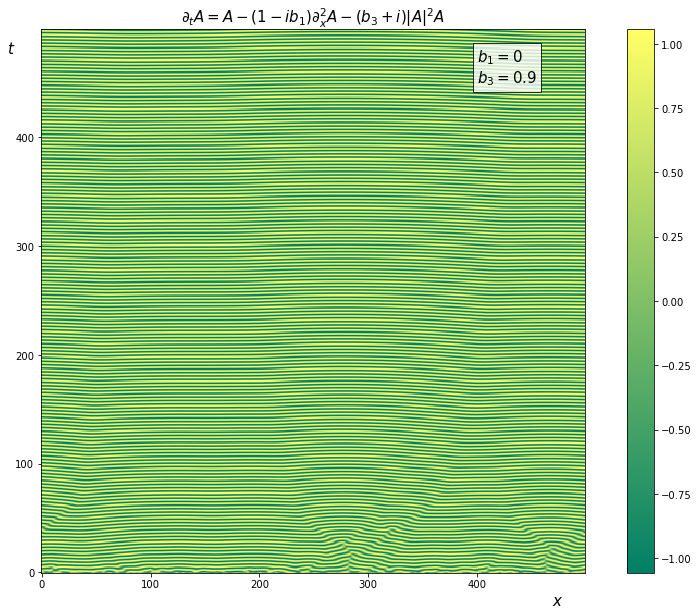

In [9]:
### Grafico de la simulacion
plt.figure(figsize = (15,10))
plt.imshow(Canvas.real, aspect='equal', cmap='summer', origin='lower')
#plt.xticks([100,200,300,400,500],dx*np.array([100,200,300,400,500]))
#plt.yticks([100,200,300,400,500],100*dt*np.array([100,200,300,400,500]))
plt.text(400,450 , r'$b_1 = $'+ str(b1) +'\n'+ r'$b_3 = $'+str(b3),fontsize=15, 
         bbox=dict(facecolor='white', alpha=0.8))
plt.xlabel(r'$x$', fontsize=15, x = .95)
plt.ylabel(r'$t$', fontsize=15, y = .95, rotation=0)
plt.title(r'$\partial_t A = A - (1-ib_1)\partial_x^2 A - (b_3 + i)|A|^2A$', fontsize=15)
plt.colorbar()
plt.show()


In [29]:
envelope

array([[ 0.20729516,  0.29513124,  0.41915021, ...,  0.36282665,
         0.39327901,  0.39293352],
       [ 1.31116783,  1.39631168,  1.43487055, ...,  0.62459294,
         0.94726127,  1.16675938],
       [ 1.61283168,  1.53948843,  1.4644046 , ...,  1.94821054,
         1.81908023,  1.70118588],
       ..., 
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [19]:
1/np.sqrt(b3)

1.3245323570650438